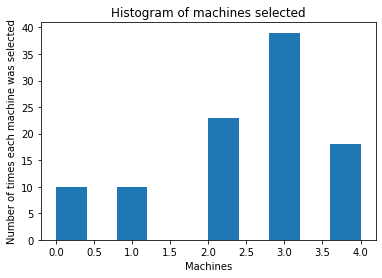

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


class ThompsonSampling:
    def __init__(self, path, N, m):
        self.__N = N
        self.__m = m
        self.__machine_selected = []
        self.__number_of_rewards_1 = [0] * m
        self.__number_of_rewards_0 = [0] * m
        self.__total_rewards = 0
        self.__dataset = pd.read_csv(path)

    def implement_thompson_sampling(self):
        for round in range(self.__N):
            machine = -1
            max_random = 0
            for mac in range(self.__m):
                beta = random.betavariate(self.__number_of_rewards_1[mac] + 1, self.__number_of_rewards_0[mac] + 1)
                if beta > max_random:
                    max_random = beta
                    machine = mac
            self.__machine_selected.append(machine)
            reward = self.__dataset.values[round, machine]
            if reward == 1:
                self.__number_of_rewards_1[machine] += 1
            else:
                self.__number_of_rewards_0[machine] += 1
            self.__total_rewards += reward

    def visualize(self):
        plt.hist(self.__machine_selected)
        plt.title("Histogram of machines selected")
        plt.xlabel("Machines")
        plt.ylabel("Number of times each machine was selected")
        plt.plot()
        input()


path = "C:\\Users\\Anoops\\PycharmProjects\\pythonProject\\dataset.csv"
N = 100
m = 5
ts = ThompsonSampling(path, N, m)
ts.implement_thompson_sampling()
ts.visualize()
